In [776]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset_orb = pd.read_csv('/Users/adithya/Documents/MATLAB/project/cbir_dataset/sample/X_orb_desc_change.csv',header = None)
dataset_lbp = pd.read_csv('/Users/adithya/Documents/MATLAB/project/cbir_dataset/sample/X_lbp_desc2_long.csv',header = None)

In [777]:
dataset_orb.shape

(1582, 500)

In [778]:
dataset_lbp.shape

(1582, 1770)

In [779]:
target = pd.read_csv('/Users/adithya/Documents/MATLAB/project/cbir_dataset/sample/y_orb_ouput.csv',header = None)

In [780]:
file_paths = pd.read_csv('/Users/adithya/Documents/MATLAB/project/cbir_dataset/sample/X_image_path_lbp2_long.csv')

In [781]:
file_paths.shape

(1582, 2)

In [782]:
file_paths['0'][0]

'/Users/adithya/Documents/MATLAB/project/cbir_dataset/sample/images/00000030_001.png'

In [783]:
file_paths_dict = file_paths.set_index('0').to_dict()

In [784]:
file_paths_dict2 = file_paths_dict['Unnamed: 0']

In [785]:
num_pic = file_paths_dict2['/Users/adithya/Documents/MATLAB/project/cbir_dataset/sample/images/00001698_004.png']

In [786]:
answer1 = target[0][num_pic]

In [787]:
answer1

'Atelectasis'

In [788]:
len(file_paths_dict2)

1582

In [789]:
file_paths.head()

,Unnamed: 0,0
0,0,/Users/adithya/Documents/MATLAB/project/cbir_d...
1,1,/Users/adithya/Documents/MATLAB/project/cbir_d...
2,2,/Users/adithya/Documents/MATLAB/project/cbir_d...
3,3,/Users/adithya/Documents/MATLAB/project/cbir_d...
4,4,/Users/adithya/Documents/MATLAB/project/cbir_d...


In [790]:
X_orb = dataset_orb
X_lbp = dataset_lbp
y = target

# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train_orb, X_test_orb, y_train, y_test = train_test_split(X_orb, y, test_size = 0.25, random_state = 0)
X_train_lbp, X_test_lbp, y_train, y_test = train_test_split(X_lbp, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_orb = sc.fit_transform(X_train_orb)
X_test_orb = sc.transform(X_test_orb)
X_train_lbp = sc.fit_transform(X_train_lbp)
X_test_lbp = sc.transform(X_test_lbp)

In [791]:
file_paths_train, file_paths_test = train_test_split(file_paths, test_size = 0.25, random_state = 0)

In [792]:
file_paths_train.shape

(1186, 2)

In [793]:
X_train = np.hstack((X_train_orb,X_train_lbp))
X_test = np.hstack((X_test_orb,X_test_lbp))

In [794]:
# Applying LLE
#from sklearn.decomposition import PCA
from sklearn import manifold
lle_orb = manifold.LocallyLinearEmbedding(n_neighbors = 16, n_components=500,
                                      method='standard')
lle_lbp = manifold.LocallyLinearEmbedding(n_neighbors = 16, n_components=500,
                                      method='standard')
#pca_orb = PCA(n_components = 500)
#pca_lbp = PCA(n_components = 500)
#pca_total = PCA()
X_train_orb = lle_orb.fit_transform(X_train_orb)
X_train_lbp = lle_lbp.fit_transform(X_train_lbp)
#pca = PCA(n_components = None)
#X_train = pca_total.fit_transform(X_train)
#X_test = pca_total.transform(X_test)
#explained_variance = pca.explained_va

In [795]:
from sklearn.preprocessing import OneHotEncoder
from numpy import array
from numpy import argmax
import numpy
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y_train.values.ravel())

In [796]:
from keras.utils import np_utils
categorical_train = np_utils.to_categorical(integer_encoded)

In [797]:
label_encoder = LabelEncoder()
integer_encoded_test = label_encoder.fit_transform(y_test.values.ravel())

In [798]:
categorical_encoded_test = np_utils.to_categorical(integer_encoded_test)

In [799]:
# encode class values as integers
from keras.utils import np_utils
encoder = LabelEncoder()
encoder.fit(integer_encoded)
encoded_Y = encoder.transform(integer_encoded)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [800]:
from keras.utils import np_utils
encoder_test = LabelEncoder()
encoder_test.fit(integer_encoded_test)
encoded_Y_test = encoder_test.transform(integer_encoded_test)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_test = np_utils.to_categorical(encoded_Y_test)

In [801]:
from keras.models import load_model
model = load_model('my_model2a_lle_last.h5')

In [802]:
import opencv
# To performing path manipulations 
import os
# Local Binary Pattern function
from skimage.feature import local_binary_pattern
# To calculate a normalized histogram 
from scipy.stats import itemfreq

from sklearn.preprocessing import normalize
# Utility package -- use pip install cvutils to install
import cvutils
# To read class from file
import csv
import scipy
import cv2

In [803]:
rows = 1024
columns = 1024
r4 = int(rows/4)
c4 = int(columns/4)
r3 = int(rows/3)
c3 = int(columns/3)
r2 = int(rows/2)
c2 = int(columns/2)
r1 = rows
c1 = columns
import numpy as np
from skimage.io import imread
input_image = '/Users/adithya/Documents/MATLAB/project/cbir_dataset/sample/images/00001698_004.png'
im = imread(input_image)
if(im.shape == (1024,1024)):
    im_gray = im
else:
    im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    
image111 = im_gray
image221=im_gray[0:r2,0:c2]
image222=im_gray[0:r2,c2+0:2*c2]
image223=im_gray[r2+0:2*r2,0:c2]
image224=im_gray[r2+0:2*r2,c2+0:2*c2]
image331 = im_gray[0:r3, 0:c3]
image332 = im_gray[0:r3, c3+0:2*c3]
image333 = im_gray[0:r3, 2*c3+0:3*c3+1]
image334 = im_gray[r3+0:2*r3, 0:c3]
image335 = im_gray[r3+0:2*r3, c3+0:2*c3]
image336 = im_gray[r3+0:2*r3, 2*c3+0:3*c3+1]
image337 = im_gray[2*r3+0:3*r3+1, 0:c3]
image338 = im_gray[2*r3+0:3*r3+1, c3+0:2*c3]
image339 = im_gray[2*r3+0:3*r3+1, 2*c3+0:3*c3+1]
image441 = im_gray[0:r4, 0:c4]
image442 = im_gray[0:r4, c4+0:2*c4]
image443 = im_gray[0:r4, 2*c4+0:3*c4]
image444 = im_gray[0:r4, 3*c4+0:4*c4]
image445 = im_gray[r4+0:2*r4, 0:c4]
image446 = im_gray[r4+0:2*r4, c4+0:2*c4]
image447 = im_gray[r4+0:2*r4, 2*c4+0:3*c4]
image448 = im_gray[r4+0:2*r4, 3*c4+0:4*c4]
image449 = im_gray[2*r4+0:3*r4, 0:c4]
image4410 = im_gray[2*r4+0:3*r4, c4+0:2*c4]
image4411 = im_gray[2*r4+0:3*r4, 2*c4+0:3*c4]
image4412 = im_gray[2*r4+0:3*r4, 3*c4+0:4*c4]
image4413 = im_gray[3*r4+0:4*r4, 0:c4]
image4414 = im_gray[3*r4+0:4*r4, c4+0:2*c4]
image4415 = im_gray[3*r4+0:4*r4, 2*c4+0:3*c4]
image4416 = im_gray[3*r4+0:4*r4, 3*c4+0:4*c4]

lbp_image111=local_binary_pattern(image111,8,1,method='nri_uniform')
histogram111=scipy.stats.itemfreq(lbp_image111)
lbp_image221=local_binary_pattern(image221,8,1,method='nri_uniform')
histogram221=scipy.stats.itemfreq(lbp_image221)
lbp_image222=local_binary_pattern(image222,8,1,method='nri_uniform')
histogram222=scipy.stats.itemfreq(lbp_image222)
lbp_image223=local_binary_pattern(image223,8,1,method='nri_uniform')
histogram223=scipy.stats.itemfreq(lbp_image223)
lbp_image224=local_binary_pattern(image224,8,1,method='nri_uniform')
histogram224=scipy.stats.itemfreq(lbp_image224)
lbp_image331=local_binary_pattern(image331,8,1,method='nri_uniform')
histogram331=scipy.stats.itemfreq(lbp_image331)
lbp_image332=local_binary_pattern(image332,8,1,method='nri_uniform')
histogram332=scipy.stats.itemfreq(lbp_image332)
lbp_image333=local_binary_pattern(image333,8,1,method='nri_uniform')
histogram333=scipy.stats.itemfreq(lbp_image333)
lbp_image334=local_binary_pattern(image334,8,1,method='nri_uniform')
histogram334=scipy.stats.itemfreq(lbp_image334)
lbp_image335=local_binary_pattern(image335,8,1,method='nri_uniform')
histogram335=scipy.stats.itemfreq(lbp_image335)
lbp_image336=local_binary_pattern(image336,8,1,method='nri_uniform')
histogram336=scipy.stats.itemfreq(lbp_image336)
lbp_image337=local_binary_pattern(image337,8,1,method='nri_uniform')
histogram337=scipy.stats.itemfreq(lbp_image337)
lbp_image338=local_binary_pattern(image338,8,1,method='nri_uniform')
histogram338=scipy.stats.itemfreq(lbp_image338)
lbp_image339=local_binary_pattern(image339,8,1,method='nri_uniform')
histogram339=scipy.stats.itemfreq(lbp_image339)
lbp_image441=local_binary_pattern(image441,8,1,method='nri_uniform')
histogram441=scipy.stats.itemfreq(lbp_image441)
lbp_image442=local_binary_pattern(image442,8,1,method='nri_uniform')
histogram442=scipy.stats.itemfreq(lbp_image442)
lbp_image443=local_binary_pattern(image443,8,1,method='nri_uniform')
histogram443=scipy.stats.itemfreq(lbp_image443)
lbp_image444=local_binary_pattern(image444,8,1,method='nri_uniform')
histogram444=scipy.stats.itemfreq(lbp_image444)
lbp_image445=local_binary_pattern(image445,8,1,method='nri_uniform')
histogram445=scipy.stats.itemfreq(lbp_image445)
lbp_image446=local_binary_pattern(image446,8,1,method='nri_uniform')
histogram446=scipy.stats.itemfreq(lbp_image446)
lbp_image447=local_binary_pattern(image447,8,1,method='nri_uniform')
histogram447=scipy.stats.itemfreq(lbp_image447)
lbp_image448=local_binary_pattern(image448,8,1,method='nri_uniform')
histogram448=scipy.stats.itemfreq(lbp_image448)
lbp_image449=local_binary_pattern(image449,8,1,method='nri_uniform')
histogram449=scipy.stats.itemfreq(lbp_image449)
lbp_image4410=local_binary_pattern(image4410,8,1,method='nri_uniform')
histogram4410=scipy.stats.itemfreq(lbp_image4410)
lbp_image4411=local_binary_pattern(image4411,8,1,method='nri_uniform')
histogram4411=scipy.stats.itemfreq(lbp_image4411)
lbp_image4412=local_binary_pattern(image4412,8,1,method='nri_uniform')
histogram4412=scipy.stats.itemfreq(lbp_image4412)
lbp_image4413=local_binary_pattern(image4413,8,1,method='nri_uniform')
histogram4413=scipy.stats.itemfreq(lbp_image4413)
lbp_image4414=local_binary_pattern(image4414,8,1,method='nri_uniform')
histogram4414=scipy.stats.itemfreq(lbp_image4414)
lbp_image4415=local_binary_pattern(image4415,8,1,method='nri_uniform')
histogram4415=scipy.stats.itemfreq(lbp_image4415)
lbp_image4416=local_binary_pattern(image4416,8,1,method='nri_uniform')
histogram4416=scipy.stats.itemfreq(lbp_image4416)
histogram = np.vstack((histogram111,histogram221,histogram222,histogram223,histogram224,histogram331,histogram332,histogram333,histogram334,histogram335,histogram336,histogram337,histogram338,histogram339,histogram441,histogram442,histogram443,histogram444,histogram445,histogram446,histogram447,histogram448,histogram449,histogram4410,histogram4411,histogram4412,histogram4413,histogram4414,histogram4415,histogram4416))
hist = histogram[:, 1]/sum(histogram[:, 1])

In [804]:
# Initiate STAR detector
orb = cv2.ORB_create()
# find the keypoints with ORB
kp = orb.detect(im_gray,None)
# compute the descriptors with ORB
kp, x = orb.compute(im_gray, kp)#here x is the descriptor
x2 = x.ravel()
# Normalize the histogram
x3 = x[:, 1]/sum(x[:, 1])




In [805]:
hist.shape

(1770,)

In [806]:
x3.shape

(490,)

In [807]:
N = 500-(x3.shape)[0]
x3= np.pad(x3, (0, N), 'constant')
x3 = x3.reshape(-1,1)

In [808]:
x3.shape

(500, 1)

In [809]:
N = 1770-(hist.shape)[0]
hist= np.pad(hist, (0, N), 'constant')
hist = hist.reshape(-1,1)

In [810]:
hist.shape

(1770, 1)

In [811]:
x3 = x3.T
hist = hist.T

In [812]:
input_image_orb = lle_orb.transform(x3)
input_image_lbp = lle_lbp.transform(hist)

In [813]:
input_image_orb.shape

(1, 500)

In [814]:
input_image_lbp.shape

(1, 500)

In [815]:
order = ['Atelectasis','Cardiomegaly','Consolidation','Edema','Effusion','Emphysema','Fibrosis','Hernia','Infiltration','Mass','Nodule','Pleural_Thickening','Pneumonia','Pneumothorax']

In [816]:
total = np.hstack((input_image_orb,input_image_lbp))

In [817]:
total.shape

(1, 1000)

In [818]:
new_pred = model.predict(total)

In [819]:
new_pred

array([[0.12251354, 0.02926892, 0.04455866, 0.0258927 , 0.12577304,
        0.02503021, 0.02834035, 0.00463267, 0.3157476 , 0.05722818,
        0.09763996, 0.03871694, 0.00808024, 0.07657707]], dtype=float32)

In [820]:
import numpy as np
arg = np.argmax(new_pred)

In [821]:
arg

8

In [822]:
inp_ans = new_pred[0][arg]

In [823]:
inp_ans

0.3157476

In [824]:
predicted = pd.read_csv('/Users/adithya/Documents/MATLAB/project/cbir_dataset/sample/predicted_lle.csv')

In [825]:
predicted.shape

(1186, 15)

In [826]:
fin = []
for i in range(0,1186):
    ans = predicted[str(np.argmax(new_pred))][i]
    fin.append(abs(inp_ans-ans))

In [827]:
fin

[7.091127090463889e-06,
 1.9711127090427105e-05,
 1.1688872909532133e-05,
 1.1448872909547436e-05,
 9.11270904291328e-08,
 1.1411127090465989e-05,
 1.3588872909531258e-05,
 7.148872909534809e-06,
 3.308872909557614e-06,
 1.8887290953450986e-07,
 2.388729095637032e-07,
 8.818872909543973e-06,
 1.3828872909571466e-05,
 1.6091127090445134e-05,
 1.54411270904542e-05,
 1.6808872909557238e-05,
 1.8811127090456736e-05,
 1.6388872909556262e-05,
 8.111127090482118e-06,
 1.0671127090466914e-05,
 9.538872909553575e-06,
 1.8811270904306454e-06,
 2.888872909556639e-06,
 1.2548872909523556e-05,
 9.288872909574142e-06,
 1.8811270904306454e-06,
 9.928872909570341e-06,
 1.1111270904473614e-06,
 1.1127090415730123e-08,
 1.8811127090456736e-05,
 7.538872909551575e-06,
 3.938872909559077e-06,
 3.611270904535502e-07,
 1.3891127090437383e-05,
 1.8111270904674903e-06,
 8.94112709043382e-06,
 1.1688872909532133e-05,
 7.181127090472028e-06,
 1.0668872909569416e-05,
 7.92887290956834e-06,
 5.311127090512624e-06

In [828]:
#fin2 = abs(fin-inp_ans)

In [829]:
#fin2

In [830]:
ind = np.argpartition(fin, 10)[:10]

In [831]:
ind

array([138, 167, 868,  28, 258, 225, 643, 462, 511, 775])

In [832]:
import io
pd.read_csv(io.StringIO(file_paths_train.to_csv(index=False)))
file_paths_train['0'][1360]

'/Users/adithya/Documents/MATLAB/project/cbir_dataset/sample/images/00023162_023.png'

In [833]:
from PIL import Image

In [834]:
gg_array = {}
class_name = {}
for num,i in enumerate(ind):
    imgk = file_paths['0'][i]
    gg_array[num] = imgk
    class_name[num] = y[0][i]
print(gg_array)

{0: '/Users/adithya/Documents/MATLAB/project/cbir_dataset/sample/images/00019021_002.png', 1: '/Users/adithya/Documents/MATLAB/project/cbir_dataset/sample/images/00025119_006.png', 2: '/Users/adithya/Documents/MATLAB/project/cbir_dataset/sample/images/00014897_001.png', 3: '/Users/adithya/Documents/MATLAB/project/cbir_dataset/sample/images/00003843_000.png', 4: '/Users/adithya/Documents/MATLAB/project/cbir_dataset/sample/images/00008701_049.png', 5: '/Users/adithya/Documents/MATLAB/project/cbir_dataset/sample/images/00013557_016.png', 6: '/Users/adithya/Documents/MATLAB/project/cbir_dataset/sample/images/00000181_017.png', 7: '/Users/adithya/Documents/MATLAB/project/cbir_dataset/sample/images/00013576_005.png', 8: '/Users/adithya/Documents/MATLAB/project/cbir_dataset/sample/images/00019594_003.png', 9: '/Users/adithya/Documents/MATLAB/project/cbir_dataset/sample/images/00009911_005.png'}


In [835]:
y[0][i]

'Infiltration'

In [836]:
class_name

{0: 'Atelectasis',
 1: 'Atelectasis',
 2: 'Infiltration',
 3: 'Atelectasis',
 4: 'Consolidation',
 5: 'Cardiomegaly',
 6: 'Infiltration',
 7: 'Effusion',
 8: 'Effusion',
 9: 'Infiltration'}

In [837]:
gg_array

{0: '/Users/adithya/Documents/MATLAB/project/cbir_dataset/sample/images/00019021_002.png',
 1: '/Users/adithya/Documents/MATLAB/project/cbir_dataset/sample/images/00025119_006.png',
 2: '/Users/adithya/Documents/MATLAB/project/cbir_dataset/sample/images/00014897_001.png',
 3: '/Users/adithya/Documents/MATLAB/project/cbir_dataset/sample/images/00003843_000.png',
 4: '/Users/adithya/Documents/MATLAB/project/cbir_dataset/sample/images/00008701_049.png',
 5: '/Users/adithya/Documents/MATLAB/project/cbir_dataset/sample/images/00013557_016.png',
 6: '/Users/adithya/Documents/MATLAB/project/cbir_dataset/sample/images/00000181_017.png',
 7: '/Users/adithya/Documents/MATLAB/project/cbir_dataset/sample/images/00013576_005.png',
 8: '/Users/adithya/Documents/MATLAB/project/cbir_dataset/sample/images/00019594_003.png',
 9: '/Users/adithya/Documents/MATLAB/project/cbir_dataset/sample/images/00009911_005.png'}

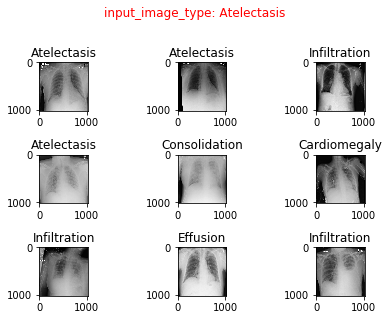

In [838]:
fig = plt.figure()
plt.gray()
plt.subplot(331)
kkl = imread(gg_array[0])
plt.title(class_name[0])
plt.imshow(kkl)
plt.subplot(332)
kk2 = imread(gg_array[1])
plt.title(class_name[1])
plt.imshow(kk2)
plt.subplot(333)
kk3 = imread(gg_array[2])
plt.title(class_name[2])
plt.imshow(kk3)
plt.subplot(334)
kk4 = imread(gg_array[3])
plt.title(class_name[3])
plt.imshow(kk4)
plt.subplot(335)
kk5 = imread(gg_array[4])
plt.title(class_name[4])
plt.imshow(kk5)
plt.subplot(336)
kk6 = imread(gg_array[5])
plt.title(class_name[5])
plt.imshow(kk6)
plt.subplot(337)
kk7 = imread(gg_array[6])
plt.title(class_name[6])
plt.imshow(kk7)
plt.subplot(338)
kk8 = imread(gg_array[7])
plt.title(class_name[7])
plt.imshow(kk8)
plt.subplot(339)
kk9 = imread(gg_array[8])
plt.title(class_name[9])
plt.imshow(kk9)
plt.suptitle('input_image_type: '+str(answer1),y='1.1',color = 'red')
plt.tight_layout()
plt.show()

In [839]:
count = 0
for i,num in enumerate(class_name):
    if(class_name[i]==answer1):
        count = count+1

In [840]:
count

3